In [6]:
#import
from auxilar import funt
from Metodos_numericos import runge_kutta_system,Euler_Mod
from Graficos import *
import matplotlib.pyplot as plt



Sistema de ecuaciones diferenciales


In [7]:
fu_f="o+w*x*y-d*x"
fu_g=" a*y*(1-b*y)-x*y"

Añadir los parámetros

In [8]:
a=float
b=float
d=float
o=float
w=float

Valores iniciales

In [9]:
dic={"a":1,"b":2,"d":6,"o":8,"w":8}
w_f=funt(fu_f)
w_f.evaluate_params(dic)
w_g=funt(fu_g)
w_g.evaluate_params(dic)
f=w_f.evaluate
g=w_g.evaluate

Show plot


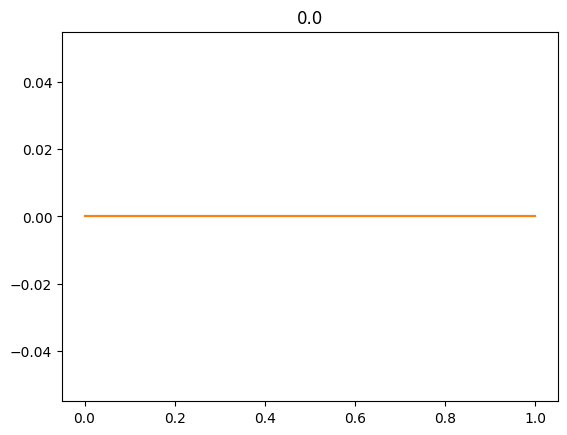

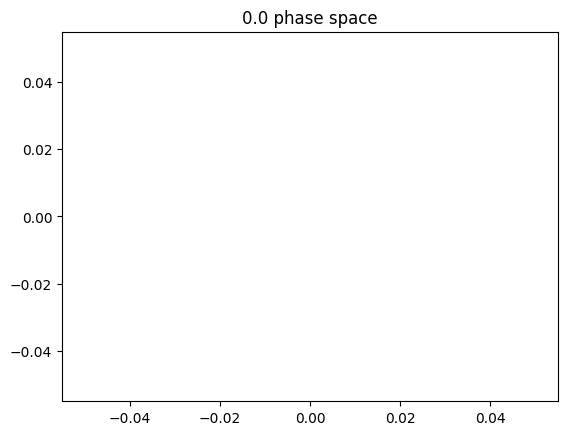

Show plot


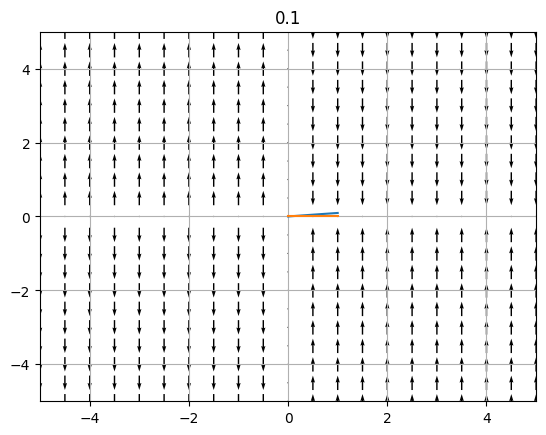

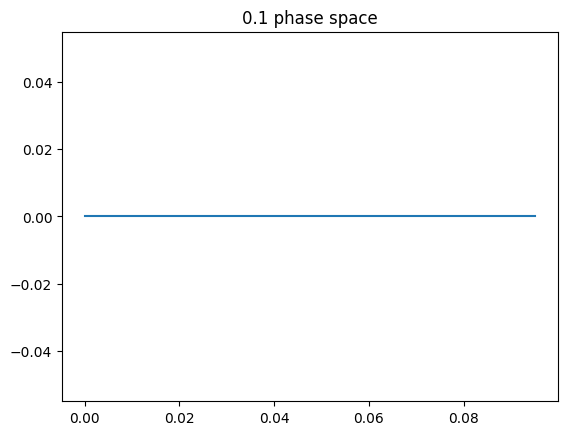

Show plot


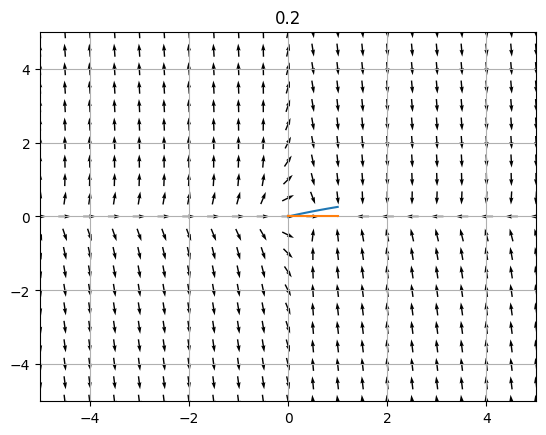

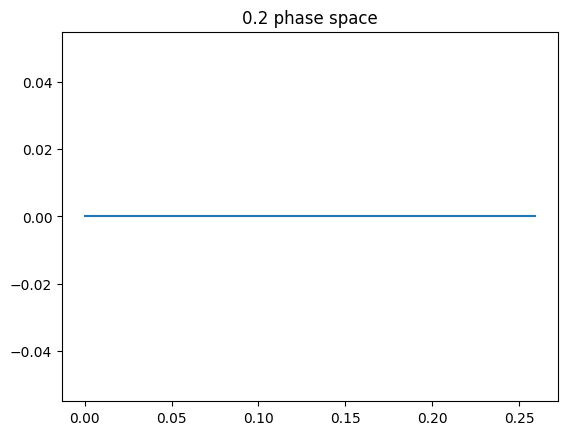

Show plot


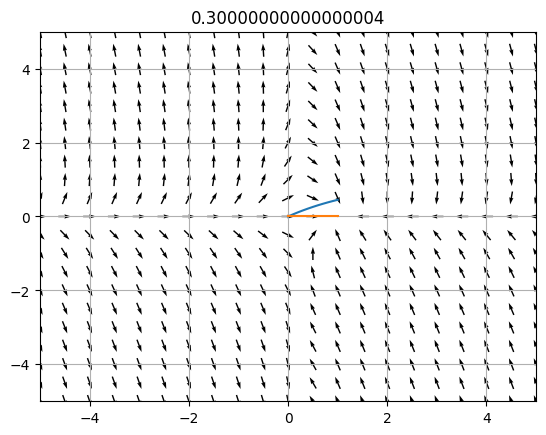

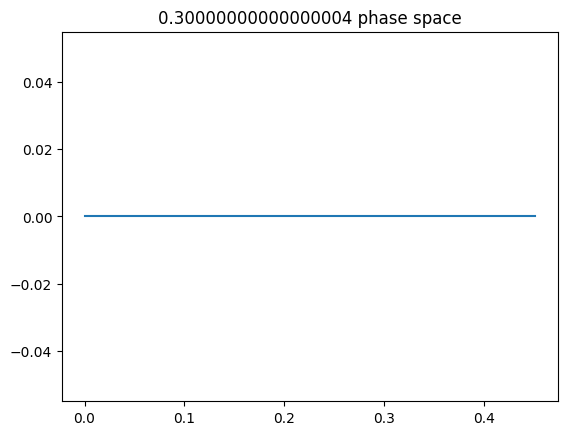

Show plot


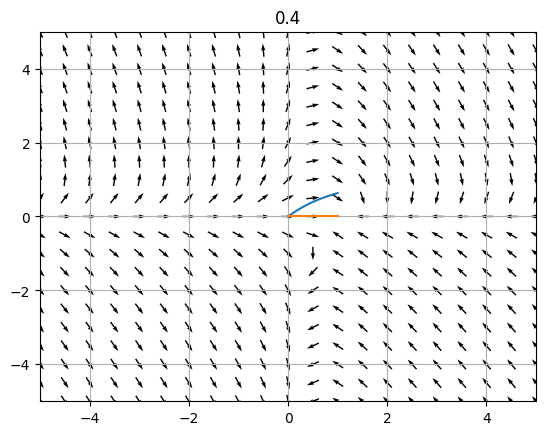

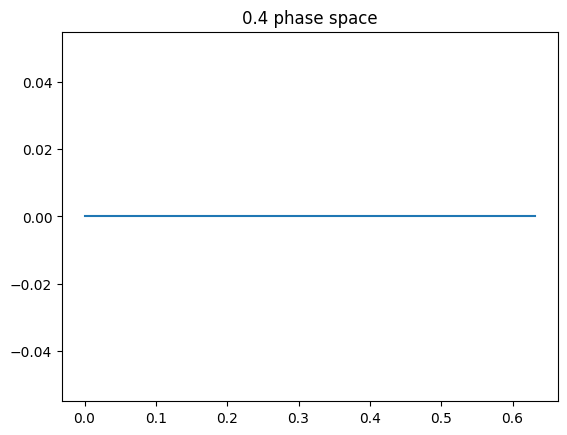

Show plot


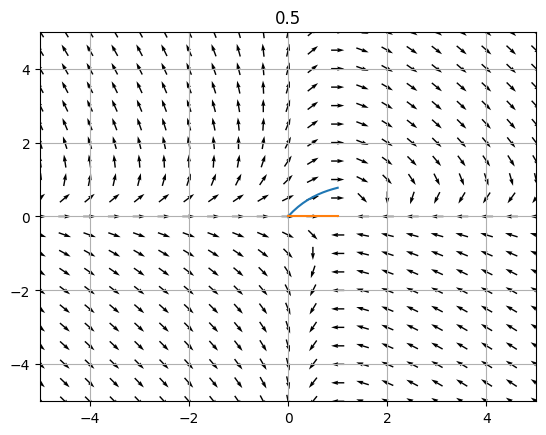

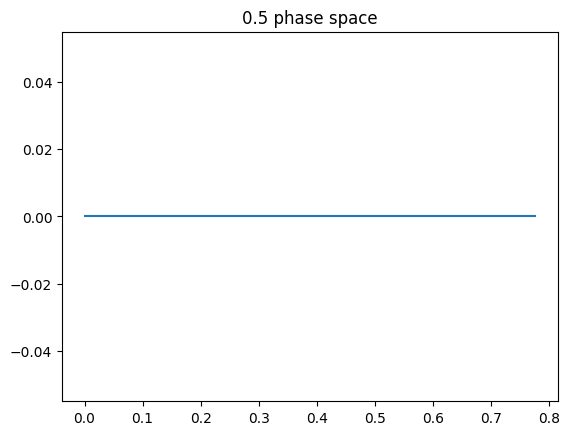

Show plot


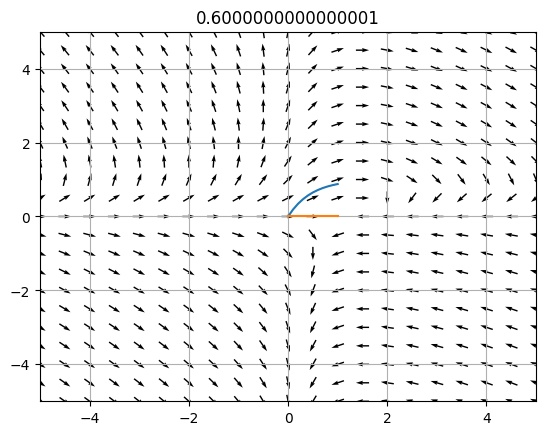

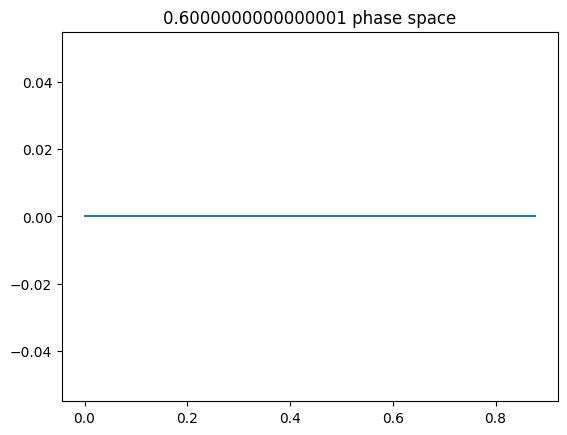

Show plot


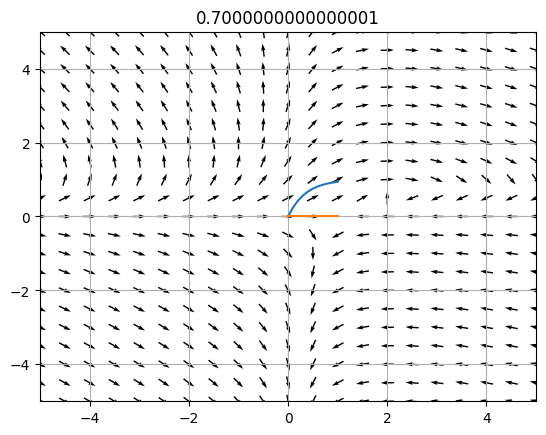

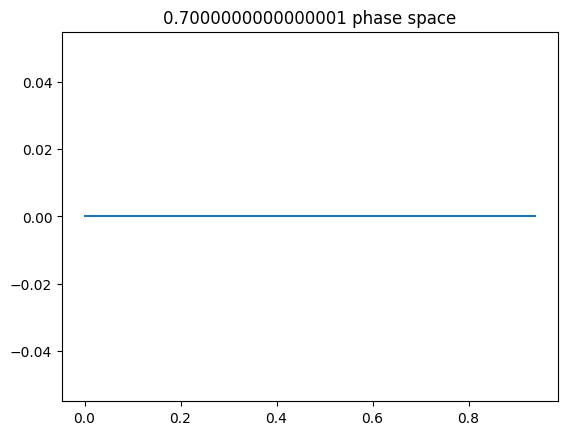

Show plot


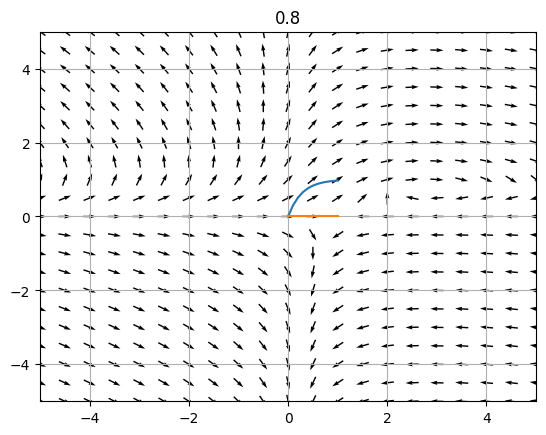

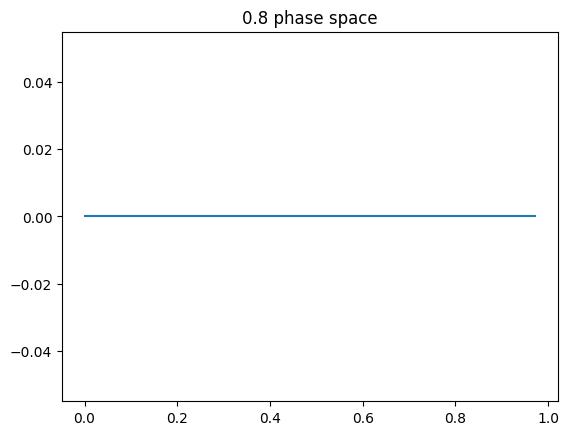

Show plot


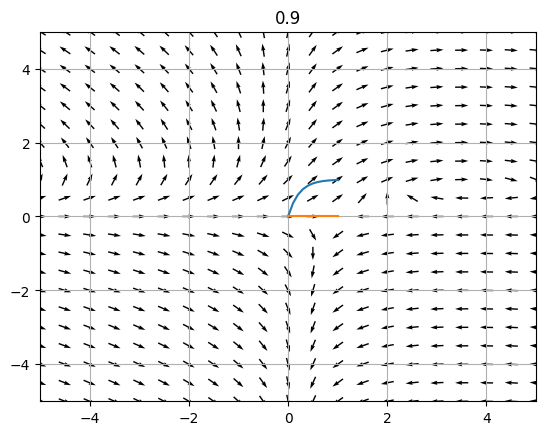

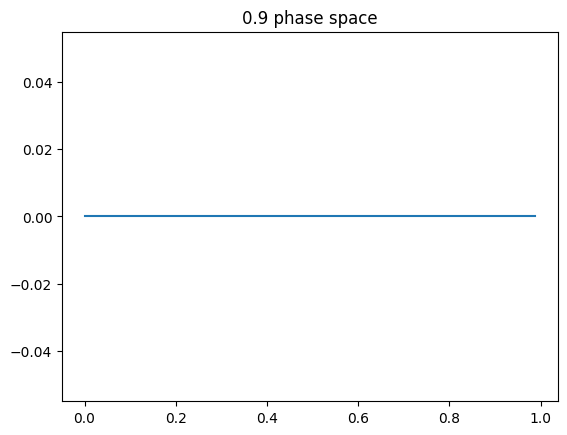

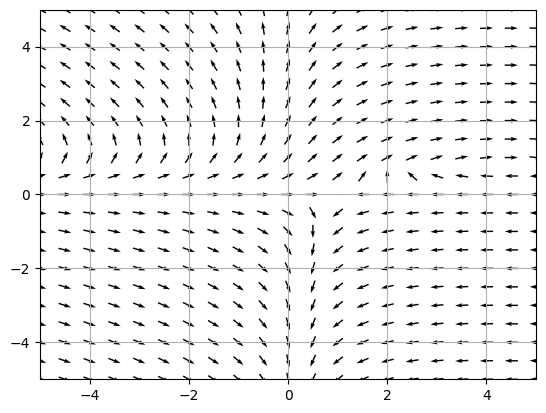

In [10]:

def Start(a,b,d,o,w):
    for i in np.arange(0,1,0.1):
        a+=i
        b+i
        d+=i
        o+=i
        w+=i
        dic={"a":a,"b":b,"d":d,"o":o,"w":w}
        w_f.evaluate_params(dic)
        f=w_f.evaluate
        w_g.evaluate_params(dic)
        g=w_g.evaluate
        t,x,y=runge_kutta_system(f=f,g=g,x0=0,y0=0,a=0,b=1,h=0.1)
        plot(t,x,y,str(i))
        s=w_f.string()
        plotdf([s.upper(),w_g.string().upper()])
        
Start(0,0,0,0,0)

III


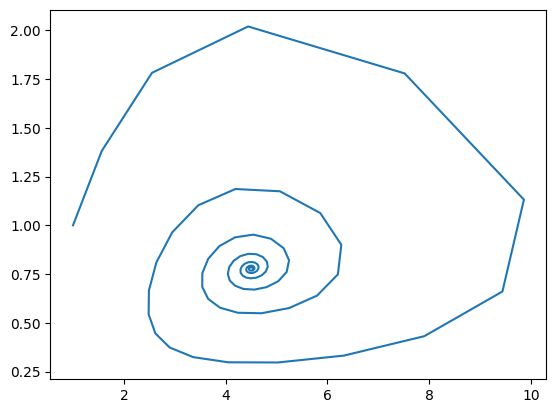

In [11]:
t,x,y=Euler_Mod(f, g, 1,1, 0, 10, 0.1)

print("III")
plt.plot(x,y)
plt.show()

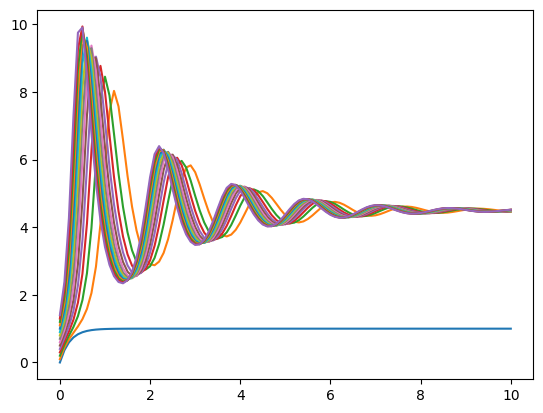

In [12]:

for i in np.arange(0,1.5,0.1):
    a,b,c=runge_kutta_system(f, g, i,i,0, 10, 0.1)
   # t=np.concatenate((t,a),axis=None); x=np.concatenate((x,b),axis=None); y=np.concatenate((y,c),axis=None)
   
    #plt.plot(a,b,a,c)
    plt.plot(a,b)

Tener la matriz jacobina para convertirlo en un sistema lineal


In [13]:
#Jacobian
import sympy as sp
x=sp.Symbol("x")
y=sp.Symbol("y")
a=sp.Symbol("α")
b=sp.Symbol("β")
d=sp.Symbol("δ")
w=sp.Symbol("ω")
o=sp.Symbol("σ")
dx=o+(w*x*y)-(d*x)
dy=a*y*(1-(b*y))-x*y
matrix=sp.Matrix([[dx,dy]])
jacobi=matrix.jacobian([x,y])

jacobi


Matrix([
[y*ω - δ,                       x*ω],
[     -y, -x - y*α*β + α*(-y*β + 1)]])

Determinante de la matriz jacobina

In [14]:
determinante=jacobi.det()

determinante

x*δ - 2*y**2*α*β*ω + 2*y*α*β*δ + y*α*ω - α*δ

Traza de la matriz Jacobina

In [15]:
traza=jacobi.trace()

traza

-x - y*α*β + y*ω + α*(-y*β + 1) - δ

Se dice que la función real de dos variables E(x, y) es:

a) definida positiva cuando E(0, 0) = 0 y E(x, y) > 0 ∀(x, y) 6= (0, 0).
Obsérvese que E(x, y) = ax2 + by2 con a > 0,b> 0 es definida positiva.

b) semidefinida positiva cuando E(0, 0) = 0 y E(x, y) ≥ 0 ∀(x, y) 6= (0, 0).

Obsérvese que E(x, y) = ax2 con a > 0 y E(x, y) = by2 con b > 0, son semidefinidas positivas.

c) definida negativa cuando E(0, 0) = 0 y E(x, y) < 0 ∀(x, y) 6= (0, 0).

Obsérvese que E(x, y) es definida negativa si, y sólo si, −E(x, y) es definida positiva.

d) semidefinida negativa cuando E(0, 0) = 0 y E(x, y) ≤ 0 ∀(x, y) 6= (0, 0)

Buscar los puntos críticos 
Igualar ambas derivadas a cero y resolver para los parámetros
dx/dt = σ+ω*x*γ-δx=0
dy/dt = α*y*(1-β)-x*y=0

dx/dt = σ+ω*x*γ-δx=0
=> [σ=0 and x=0] or [σ=0 and ω*y=δ] or [σ-x(ωy-δ)]
dy/dt = α*y*(1-β)-x*y=0
=> y=0 or [α-αβ-x=0]

Para x=0 y y=0 y σ=0

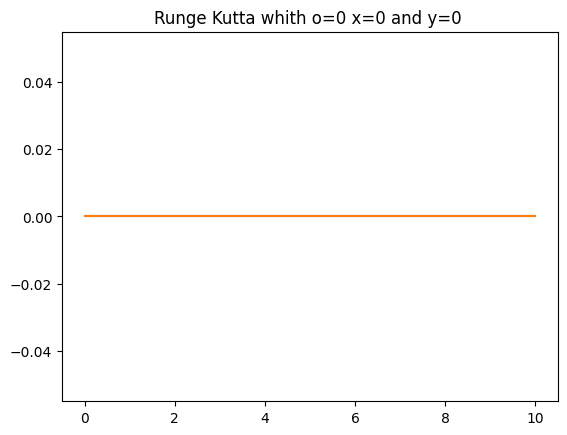

In [16]:
m=dic.copy()
m["o"]=0
w_f.evaluate_params(m)
w_g.evaluate_params(m)
t,x,y=runge_kutta_system(f=f,g=g,x0=0,y0=0,a=0,b=10,h=0.1)

plt.title("Runge Kutta whith o=0 x=0 and y=0 ") 
plt.plot(t,x,label="x")
plt.plot(t,y,label="y")

Campos vectoriales

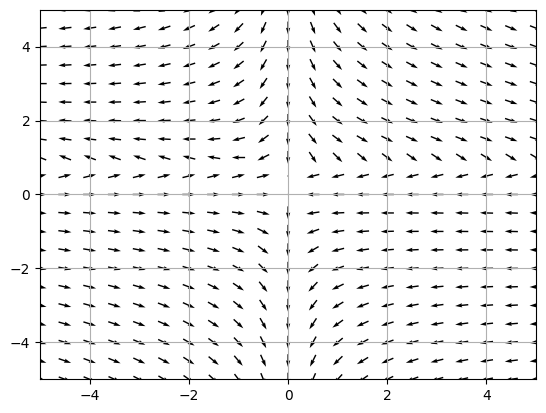

In [17]:
plotdf([w_f.string().upper(),w_g.string().upper()])

Show plot


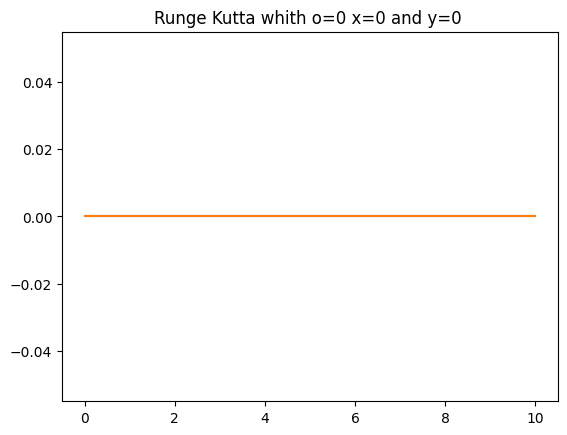

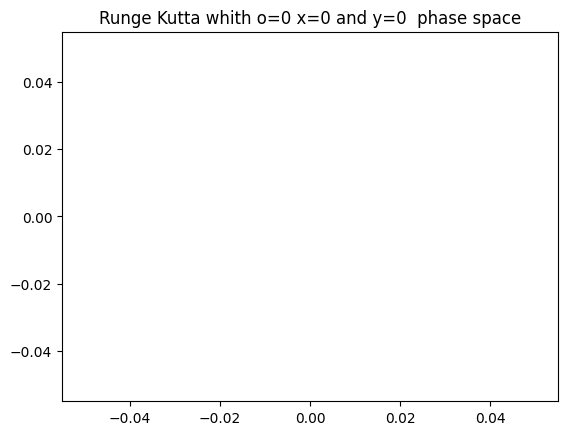

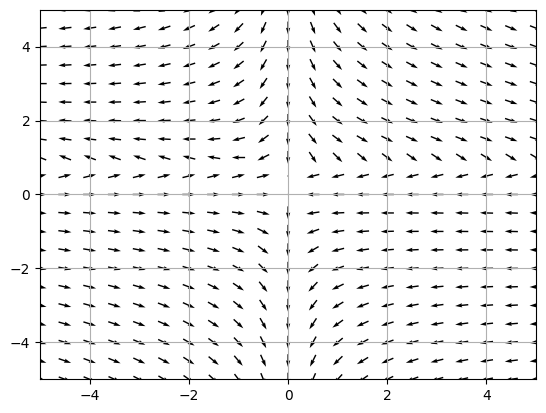

In [22]:
#Campo vectorial 2
plot(t,x,y,"Runge Kutta whith o=0 x=0 and y=0 ")
plotdf([w_f.string().upper(),w_g.string().upper()])

Análisis de estabilidad

In [18]:
#Matriz Jacobiana sustituyendo x=0 y=0
sub=jacobi.subs("x",0).subs("y",0)
sub

Matrix([
[-δ, 0],
[ 0, α]])

In [37]:
sub.eigenvals()


{-δ: 1, α: 1}

In [19]:
#determinante 
det=sub.det()
det

-α*δ

In [20]:

#traza
trace=sub.trace()
trace

α - δ

Dibujar las isoclineas
o=0
x=0 or w*y=d

y=0 or a-ab*y=x


f1=x
f2=y-4

g1=y
g2=y-x

lin=np.linspace(0,1,10)

y1 = np.sqrt(x * x) + np.sqrt(1 - x * x)
plt.plot(lin,f2)

Caso det<0 => es un punto silla =>-α*δ<0 => α>0 y δ>0

In [24]:
dic={"a":1,"b":2,"d":1,"o":0,"w":8}
w_f=funt(fu_f)
w_f.evaluate_params(dic)
w_g=funt(fu_g)
w_g.evaluate_params(dic)
f=w_f.evaluate
g=w_g.evaluate

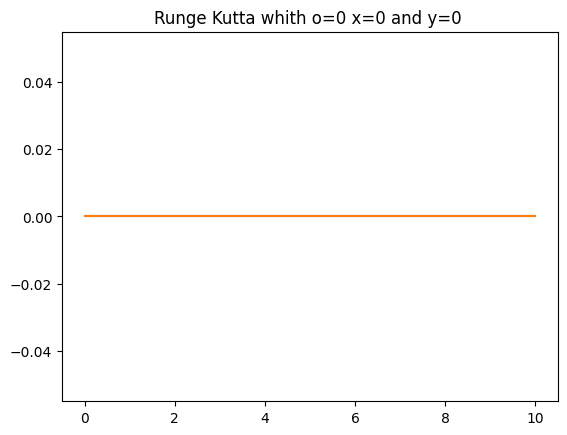

In [25]:

add=w_f.evaluate_params(dic)
w_g.evaluate_params(dic)
t,x,y=runge_kutta_system(f=f,g=g,x0=0,y0=0,a=0,b=10,h=0.1)

plt.title("Runge Kutta whith o=0 x=0 and y=0 ") 
plt.plot(t,x,label="x")
plt.plot(t,y,label="y")

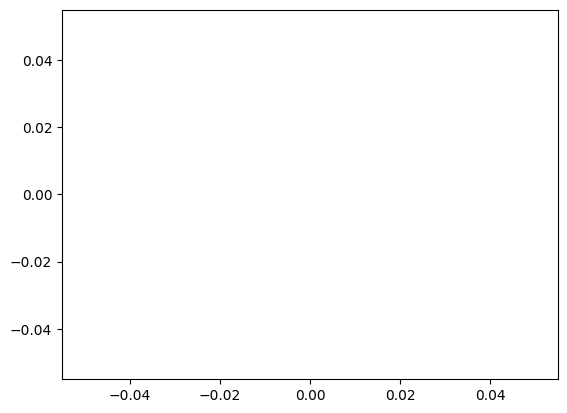

In [ ]:
plt.plot(x,y)

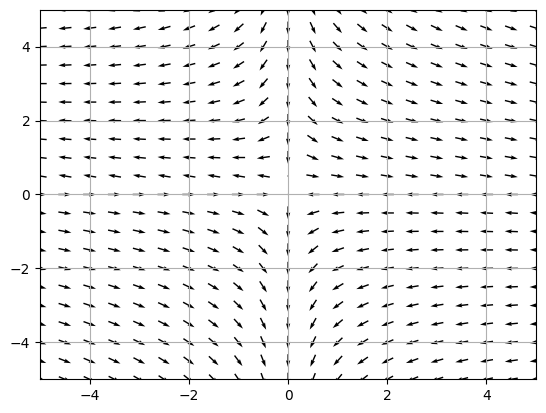

In [26]:
plotdf([w_f.string().upper(),w_g.string().upper()])

Se visualiza que la existencia de un punto silla es posible cuando α>0 y δ>0
dado que los vectores no convergen a un punto fijo 
por tanto las trayectorias no lo harán


Analizar para caso que α<0 y δ>0 o α>0 y δ<0
det>0
traza^2  - 4*det >=0 para todo valor dado que 

(α-δ) -4*α*δ

α^2 -2*α*δ + δ^2 -4*α*δ

α^2 + δ^2 -6*α*δ
 
Como uno de los dos es negativo entonces la traza^2 - 4*det > 0
si α<0 es estable
si δ<0 es inestable

α<0  estabilidad

In [ ]:
dic={"a":-11,"b":2,"d":1,"o":0,"w":8}
w_f=funt(fu_f)
w_f.evaluate_params(dic)
w_g=funt(fu_g)
w_g.evaluate_params(dic)
f=w_f.evaluate
g=w_g.evaluate

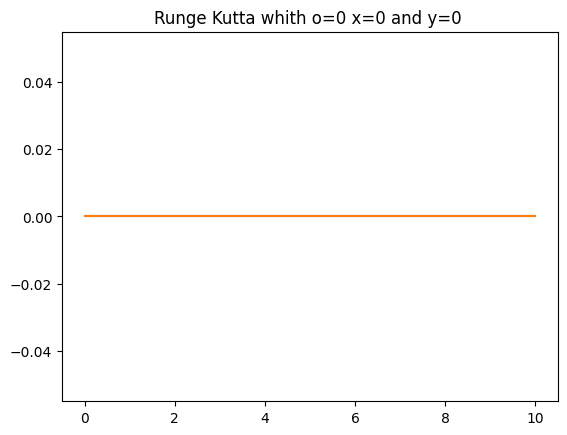

In [30]:
add=w_f.evaluate_params(dic)
w_g.evaluate_params(dic)
t,x,y=runge_kutta_system(f=f,g=g,x0=0,y0=0,a=0,b=10,h=0.1)

plt.title("Runge Kutta whith o=0 x=0 and y=0 ") 
plt.plot(t,x,label="x")
plt.plot(t,y,label="y")
plt.plot(x,y)

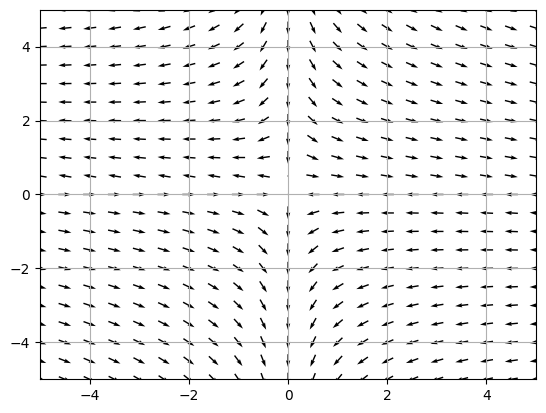

In [27]:
plotdf([w_f.string().upper(),w_g.string().upper()])

caso d<0 estabilidad

In [28]:
dic={"a":1,"b":200,"d":11,"o":0,"w":80}
w_f=funt(fu_f)
w_f.evaluate_params(dic)
w_g=funt(fu_g)
w_g.evaluate_params(dic)
f=w_f.evaluate
g=w_g.evaluate

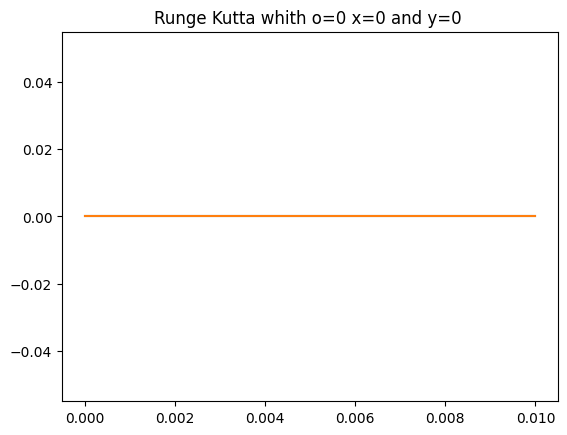

In [29]:
add=w_f.evaluate_params(dic)
w_g.evaluate_params(dic)
t,x,y=runge_kutta_system(f=f,g=g,x0=0,y0=0,a=0,b=0.01,h=0.001)

plt.title("Runge Kutta whith o=0 x=0 and y=0 ") 
plt.plot(t,x,label="x")
plt.plot(t,y,label="y")

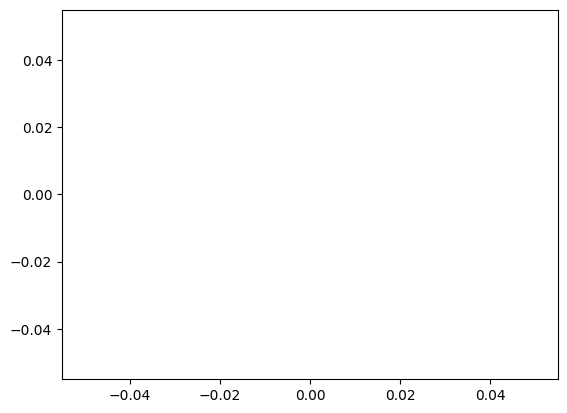

In [ ]:
plt.plot(x,y)

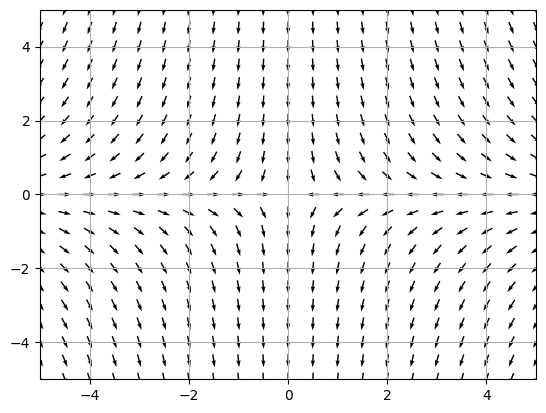

In [31]:
plotdf([w_f.string().upper(),w_g.string().upper()])

(-4.0, 4.0)

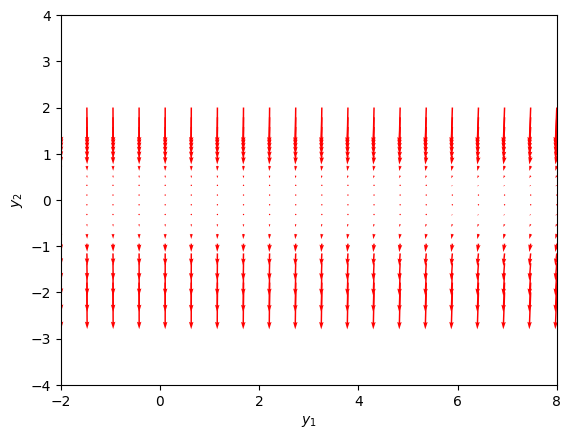

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(Y, t):
    y1, y2 = Y
    return [0.001*0.1*y1*y2-0.02*y1,-0.021*y1*(0.5-0.06*y1)-y2*y2]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])





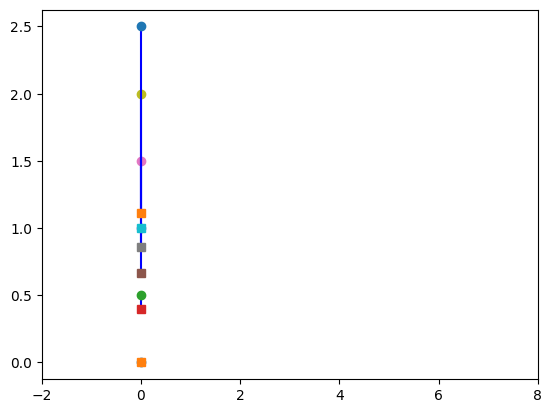

In [5]:
from scipy.integrate import odeint
import numpy as np
for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 0.5, 20)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.xlim([-2, 8])

plt.show()

Puntos de análisis en la tabla de valores


